In [1]:
import csv 
import os
import numpy as np
import random
from sklearn.metrics import roc_curve
import math
from matplotlib import pyplot
import datetime
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.signal import find_peaks
import plotly.graph_objects as go
from scipy import fft
from scipy import signal as sig
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from numpy import arange
from math import sqrt
from numpy import argmax
import random as rn
import h2o
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.metrics import precision_recall_curve
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage

In [2]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.321-b07, mixed mode)
  Starting server from F:\oracle\anacondafolder\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\khattab\AppData\Local\Temp\tmpys7qd6_q
  JVM stdout: C:\Users\khattab\AppData\Local\Temp\tmpys7qd6_q\h2o_khattab_started_from_python.out
  JVM stderr: C:\Users\khattab\AppData\Local\Temp\tmpys7qd6_q\h2o_khattab_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_khattab_otyxhr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.749 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
df = pd.read_csv("F://phd//download//TTDD-main//TTDD-main//odd_water.csv", parse_dates=['date'])

traiX=(df.loc[df["date"].dt.weekday > 1])
#per = traiX.date.dt.to_period("D")
#g = traiX.groupby(per)
#traiX=g.agg(np.mean)

tesX=(df.loc[df["date"].dt.weekday <=1])
#per = tesX.date.dt.to_period("D")
#g = tesX.groupby(per)

#tesX=g.agg(np.mean)




In [4]:

dftotal = pd.DataFrame(traiX.values[:,0:4]) 
dftotal.insert(0, 'id', range(1, 1 + len(dftotal)))
print(dftotal)
test= pd.DataFrame(tesX.values[:,0:4])
test.insert(0, 'id', range(1, 1 + len(test)))


        id                   0      1       2      3
0        1 2017-12-03 00:42:00  14.17  196.49   0.99
1        2 2017-12-03 01:42:00  14.17  196.72   2.72
2        3 2017-12-03 02:42:00  14.17  196.78   2.16
3        4 2017-12-03 03:42:00  14.17  196.96   1.54
4        5 2017-12-03 04:42:00  14.17  196.95   1.48
...    ...                 ...    ...     ...    ...
4456  4457 2018-11-03 16:42:00   14.2  133.41  22.41
4457  4458 2018-11-03 18:12:00   14.2  132.88  21.86
4458  4459 2018-11-03 19:42:00   14.2   132.7  19.46
4459  4460 2018-11-03 21:12:00   14.2  132.38  20.36
4460  4461 2018-11-03 22:42:00   14.2  132.79  20.67

[4461 rows x 5 columns]


<Figure size 1600x800 with 0 Axes>

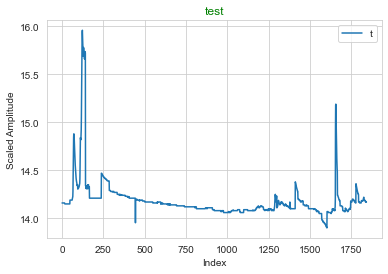

<Figure size 1600x800 with 0 Axes>

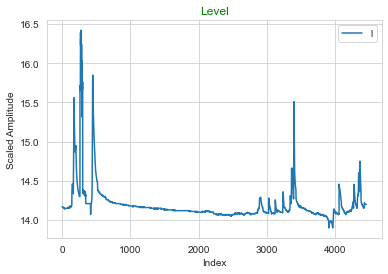

<Figure size 1600x800 with 0 Axes>

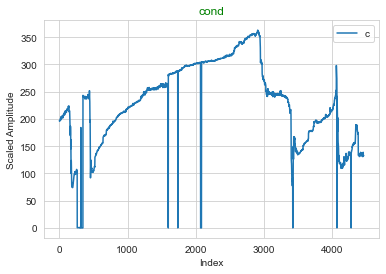

<Figure size 1600x800 with 0 Axes>

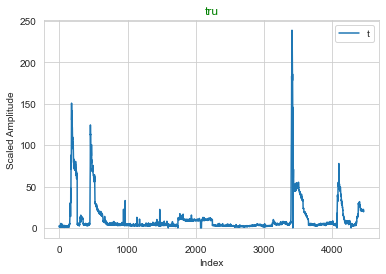

In [5]:
plt.figure(figsize=(20, 10), dpi=80)
scaler = preprocessing.MinMaxScaler()

testlev = DataFrame(test.values[:,2:3])
#testlev=DataFrame(scaler.fit_transform(testlev))
testlev.plot()
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("test", color='green')
plt.legend('test')
plt.show()
testcond = DataFrame(test.values[:,3:4])
#testcond=DataFrame(scaler.fit_transform(testcond))

testtur = DataFrame(test.values[:,4:5])
#testtur=DataFrame(scaler.fit_transform(testtur))
plt.figure(figsize=(20, 10), dpi=80)
level = DataFrame(dftotal.values[:,2:3])
#level=DataFrame(scaler.fit_transform(level))

level.plot()
#plt.scatter(level.values[:,0:1],level.values[:,1:2],color='green')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("Level", color='green')
plt.legend('level')
plt.show()
plt.figure(figsize=(20, 10), dpi=80)
cond = DataFrame(dftotal.values[:,3:4])
#cond=DataFrame(scaler.fit_transform(cond))

cond.plot()
#plt.scatter(level.values[:,0:1],cond.values[:,0:1],color='red')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("cond", color='green')
plt.legend('cond')
plt.show()
plt.figure(figsize=(20, 10), dpi=80)
tru = DataFrame(dftotal.values[:,4:5])
#tru=DataFrame(scaler.fit_transform(tru))

tru.plot()
#plt.scatter(level.values[:,0:1],tru.values[:,0:1],color='blue')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("tru", color='green')
plt.legend('tru')
plt.show()


<AxesSubplot:>

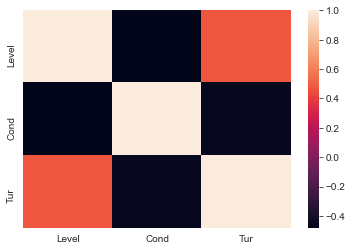

In [6]:
dfcorr = df[df.columns[0:4] ]
corr =  pd.DataFrame(dfcorr).corr()
sns.heatmap(corr)

In [7]:
from h2o.estimators import H2OIsolationForestEstimator
from sklearn.metrics import confusion_matrix
levelframe= h2o.H2OFrame(level)


levelframe=levelframe.fillna()

#train, valid= levelframe.split_frame(ratios = [.8], seed = 1234)
#hh=pd.DataFrame(g.sum().values[:,4:5])
#ytrain, yvalid= h2o.H2OFrame(hh).split_frame(ratios = [.8], seed = 1234)
# Set the predictors
predictors = levelframe

# Define an Extended Isolation forest model




model = H2OIsolationForestEstimator(sample_rate = 0.1,
                                    max_depth = 20,
                                    ntrees = 50)
model.train(training_frame=predictors)
testlevframe= h2o.H2OFrame(testlev)
testlevframe=testlevframe.fillna()

score = model.predict(testlevframe)
result_pred = score["predict"]

# Predict the leaf node assignment
#anomaly_score = model.predict_leaf_node_assignment(testlevframe, "Path")





Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


In [8]:
dd=h2o.as_list(result_pred)

ff = np.zeros(len(tesX.values[:,5:6]))

for i in range(0, len(tesX.values[:,5:6])):
 
 if tesX.values[i,5:6]> 0:
    ff[i]=1
print(ff)
ff=h2o.as_list(h2o.H2OFrame(ff))
fpr, tpr, thresholds = roc_curve(ff,dd)

print(roc_auc_score( ff["C1"],dd))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)


[0. 0. 0. ... 0. 0. 0.]
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.5172608613210431
Threshold value is: 0.2009685230024213


In [9]:
testlevel=pd.DataFrame(ff["C1"],columns=["C1"])
typlevel=pd.DataFrame(dd)

optimal_cond=optimal_threshold

for j in range(len(typlevel)):
 #typlevel[j]["mean_length"] 
 if typlevel["predict"][j]>=optimal_threshold:
   typlevel["predict"][j]=1
 else:
   typlevel["predict"][j]  =0



In [10]:
from sklearn.metrics import f1_score
score = f1_score (ff["C1"],(typlevel.values[:,0:1]), average='micro')
score2=accuracy_score((typlevel.values[:,0:1]),ff["C1"], normalize=True)
score3=accuracy_score((typlevel.values[:,0:1]),ff, normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)

F1 Score: 0.594
accuracy_score normalize: 0.594
accuracy_score not normalize: 1094.000


In [11]:
testlev.insert(0, 'id', range(1, 1 + len(testlev)))
x=(testlev.values[:,0:1])
y=(testlev.values[:,1:2])
#z=typlevel["anomaly_score"]
r=ff

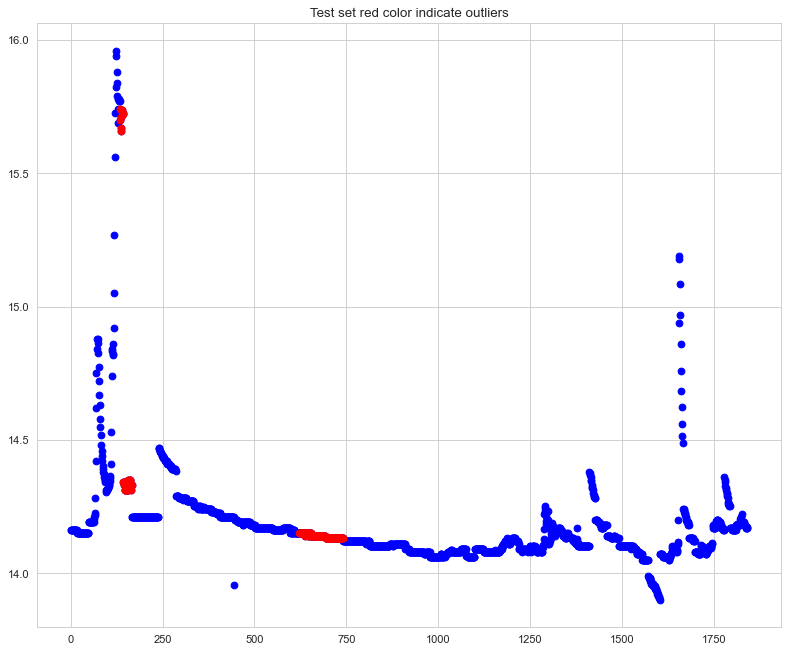

In [12]:
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')

plt.scatter(x[r[:]>=1],y[r[:]>=1],c='red')

plt.title('Test set red color indicate outliers')
plt.show()


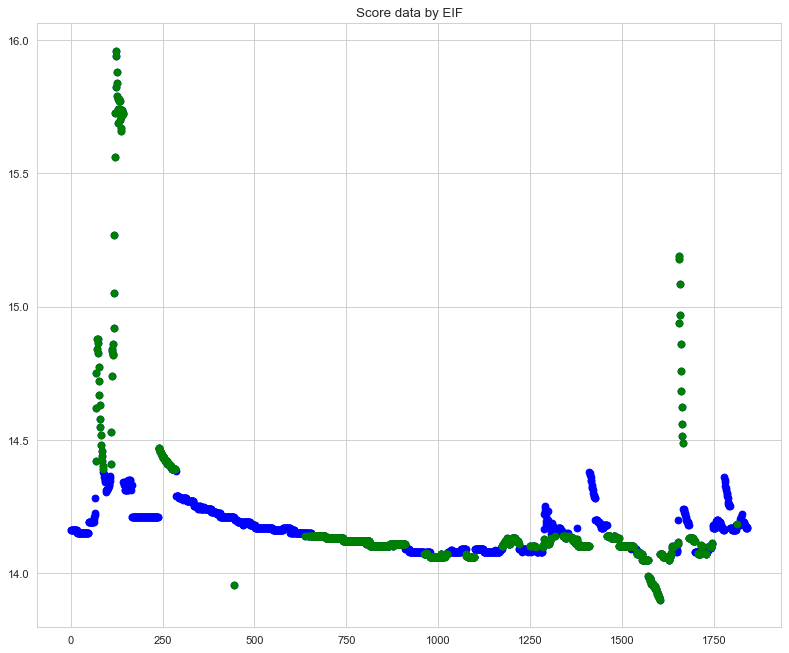

In [13]:
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')

plt.scatter(x[h2o.as_list(result_pred)[:]>=optimal_threshold],y[h2o.as_list(result_pred)[:]>=optimal_threshold],c='green')

plt.title('Score data by EIF')
plt.show()
